In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt

from sklearn import ensemble, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier

In [2]:
features_iq_train = pandas.read_csv('./generated/dengue_features_train_iq.csv')
labels_iq_train = pandas.read_csv('./generated/dengue_labels_train_iq.csv')
features_sj_train = pandas.read_csv('./generated/dengue_features_train_sj.csv')
labels_sj_train = pandas.read_csv('./generated/dengue_labels_train_sj.csv')

In [3]:
features_iq_test = pandas.read_csv('./generated/dengue_features_test_iq.csv')
features_sj_test = pandas.read_csv('./generated/dengue_features_test_sj.csv')

In [4]:
cvp = model_selection.KFold(n_splits=5, shuffle=False)

In [5]:
est = ensemble.GradientBoostingClassifier()

In [6]:
score_iq = model_selection.cross_validate(estimator=est, X=features_iq_train.loc[:, :], y=labels_iq_train['total_cases'], cv=cvp, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error'], return_train_score=True)

In [7]:
score_iq

{'fit_time': array([3.95121074, 3.51999044, 3.66091228, 4.03369713, 3.19016099]),
 'score_time': array([0.04983449, 0.01199436, 0.01099277, 0.01199293, 0.0120132 ]),
 'test_neg_mean_absolute_error': array([ -7.625     ,  -7.40384615,  -9.85576923,  -6.96153846,
        -14.69230769]),
 'train_neg_mean_absolute_error': array([-0., -0., -0., -0., -0.]),
 'test_neg_mean_squared_error': array([-211.56730769, -119.78846154, -346.75961538, -124.65384615,
        -368.42307692]),
 'train_neg_mean_squared_error': array([-0., -0., -0., -0., -0.])}

In [8]:
model_selection.GridSearchCV?

Init signature: model_selection.GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score='raise', return_train_score='warn')
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "predict", "predict_proba", "decision_function",
"transform" and "inverse_transform" if they are implemented in the
estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object.
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of dictionaries
    Dic

In [9]:
forest_iq = RandomForestClassifier(n_estimators=250, random_state=0, )#learning_rate=0.01)
forest_sj = RandomForestClassifier(n_estimators=250, random_state=0, )#learning_rate=0.01)

In [10]:
forest_iq.fit(X=features_iq_train, y=labels_iq_train['total_cases'])
forest_sj.fit(X=features_sj_train, y=labels_sj_train['total_cases'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
importances_iq = forest_iq.feature_importances_
std_iq = numpy.std([tree.feature_importances_ for tree in forest_iq.estimators_], axis=0)
indices_iq = numpy.argsort(importances_iq)[::-1]

importances_sj = forest_sj.feature_importances_
std_sj = numpy.std([tree.feature_importances_ for tree in forest_sj.estimators_], axis=0)
indices_sj = numpy.argsort(importances_sj)[::-1]

Feature ranking:
0. year (0.115561)
1. weekofyear (0.079492)
2. precipitation_amt_mm (0.078949)
3. reanalysis_max_air_temp_k (0.076338)
4. reanalysis_precip_amt_kg_per_m2 (0.075927)
5. reanalysis_relative_humidity_percent (0.073836)
6. reanalysis_tdtr_k (0.073612)
7. station_diur_temp_rng_c (0.073576)
8. station_precip_mm (0.073320)
9. f_ndvi (0.072771)
10. f_air_avg_temp (0.070574)
11. f_dew_point_min_air_temp (0.070254)
12. f_station_temp (0.065790)


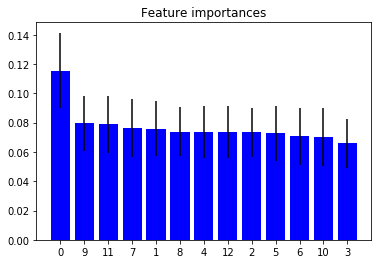

In [12]:
# Print the feature ranking
print("Feature ranking:")

for f in range(features_iq_train.shape[1]):
    print("%d. %s (%f)" % (f, features_iq_train.columns[f], importances_iq[indices_iq[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features_iq_train.shape[1]), importances_iq[indices_iq],
       color="b", yerr=std_iq[indices_iq], align="center")
plt.xticks(range(features_iq_train.shape[1]), indices_iq)
plt.xlim([-1, features_iq_train.shape[1]])
plt.show()

Feature ranking:
0. year (0.092058)
1. weekofyear (0.088990)
2. precipitation_amt_mm (0.085658)
3. reanalysis_precip_amt_kg_per_m2 (0.085641)
4. reanalysis_relative_humidity_percent (0.085532)
5. reanalysis_tdtr_k (0.085428)
6. station_diur_temp_rng_c (0.084349)
7. station_precip_mm (0.083860)
8. f_ndvi_n (0.082595)
9. f_ndvi_s (0.081587)
10. f_temp (0.072159)
11. f_station_temp (0.072143)


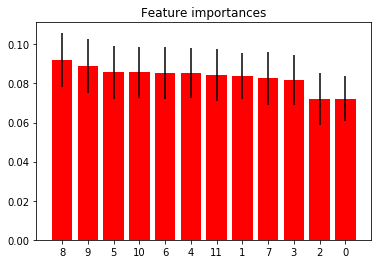

In [13]:
# Print the feature ranking
print("Feature ranking:")

for f in range(features_sj_train.shape[1]):
    print("%d. %s (%f)" % (f, features_sj_train.columns[f], importances_sj[indices_sj[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(features_sj_train.shape[1]), importances_sj[indices_sj],
       color="r", yerr=std_sj[indices_sj], align="center")
plt.xticks(range(features_sj_train.shape[1]), indices_sj)
plt.xlim([-1, features_sj_train.shape[1]])
plt.show()